#1. 헬로 파이썬

## 넘파이

###브로드캐스트

자동으로 크기에 맞게 계산하는 기능

In [ ]:
import numpy as np

In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([10,20])

In [ ]:
#넘파이 배열에서 * 연산은 원소끼리의 곱..

A * B

array([[10, 40],
       [30, 80]])

## matplotlib

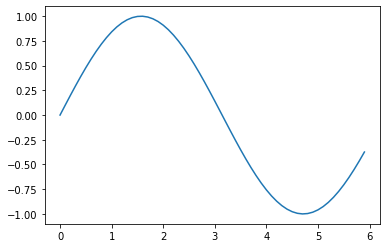

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 준비
x = np.arange(0, 6, 0.1)    #0에서 6까지 0.1 간격으로 생성
y = np.sin(x)

#그래프 그리기
plt.plot(x, y)
plt.show()

#2. 퍼셉트론

##퍼셉트론이란?

- 다수의 신호를 입력으로 받아 하나의 신호를 출력
- **신호** : **흐름**이 있는 것
- 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다

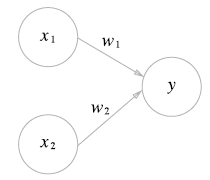

**뉴런** : 그림의 원

**가중치** : 입력신호($x_1, x_2, y)$가 뉴런에 보내질 때 곱해지는 $w_1, w_2$

**임계값**($\theta$) : 뉴런을 활성화 여부를 결정하는 한계

**동작 원리**

- $
y = \begin{cases} 0 &(w_1x_1 + w_2x_2 \le \theta) \\
\\1 &(w_1x_1 + w_2x_2 > \theta)
\end{cases}
$


## 단순한 논리 회로

- AND, NAND, OR등 여러 게이트를 만들자..
- 진리표에 맞도록 $w_1, w_2, \theta$의 값을 조정하면 된다..
    - 각 게이트의 차이는 이 매개변수 차이 뿐이다

##퍼셉트론 구현하기

- 입력이 $x_1, x_2$
- 가중치와 임계값은 함수 안에서 초기화..

In [ ]:
# AND 게이트

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7   #진리표를 만족하는 매개변수..
    tmp = x1*w1 + x2*w2

    #임계값과의 비교
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [ ]:
#확인

print(AND(0,0))     #0
print(AND(0,1))     #0
print(AND(1,0))     #0
print(AND(1,1))     #1

0
0
0
1


###가중치와 편향 도입

$
y = \begin{cases} 0 &(b + w_1x_1 + w_2x_2 \le 0) \\
\\1 &(b + w_1x_1 + w_2x_2 > 0)
\end{cases}
$

여기에서, $\theta = -b$

**편향**($b$)

: 뉴런이 얼마나 쉽게 활성화 하느냐를 조정

**가중치**($w_1, w_2$)

: 각 입력신호가 결과에 주는 영향력을 조정

In [ ]:
import numpy as np
x = np.array([0,1])         #입력
w = np.array([0.5, 0.5])    #가중치
b = -0.7                    #편향

print(x*w)
print(np.sum(x*w))

#이 값이 0을 넘는지 여부가 중요
print(np.sum(x*w) + b)

[0.  0.5]
0.5
-0.19999999999999996


In [ ]:
#다시 게이트 구현..

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [ ]:
#NAND, OR 게이트도 구현..

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])      #AND게이트와 매개변수 값만 부호 반대로!
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])      #가중치 W와 b만 다르다!
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

**결론**

- 같은 구조의 퍼셉트론인데, 차이는 가중치 매개변수의 값 뿐이다..

##다층 퍼셉트론

**단층 퍼셉트론으로는 표현하지 못한 것들을 층을 하나 늘려 구현할 수 있다**

- 퍼셉트론은 직선으로 나뉜 두 영역을 만들기 때문에 한계가 있다..
- 비선형으로 나누어야할 때 다층 퍼셉트론이 필요하다..
- 기존 게이트를 쌓아서 XOR 게이트의 진리표와 같도록 만들 수 있다..

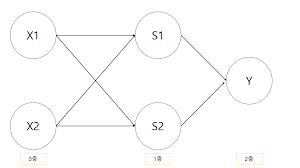

In [ ]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)     #두 퍼셉트론의 결과 조합
    return y

In [ ]:
#확인..

print(XOR(0,0))     #0
print(XOR(0,1))     #1
print(XOR(1,0))     #1
print(XOR(1,1))     #0

0
1
1
0


NAND 게이트를 엄청 모으면 컴퓨터까지...(이론상)

##정리

- 퍼셉트론은 입출력을 갖춘 알고리즘이다
- '가중치'와 '편향'이 매개변수이다
- 단층 퍼셉트론 : AND, NAND, OR
- 2층 퍼셉트론 : XOR
    - 단층은 직선형 영역만 표현가은..

#3. 신경망

#4. 신경망 학습